In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
SEQ_LENGTH = 1000
CYCLES = 15
t = np.linspace(0, CYCLES * 2 * np.pi, SEQ_LENGTH)
data = np.sin(t)
input_seq = torch.from_numpy(data[:-1]).float()
target_seq = torch.from_numpy(data[1:]).float()
input_seq = input_seq.view(-1, 1, 1)
target_seq = target_seq.view(-1, 1, 1)

print(f"Input shape: {input_seq.shape}")
print(f"Target shape: {target_seq.shape}")

Input shape: torch.Size([999, 1, 1])
Target shape: torch.Size([999, 1, 1])


In [3]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=1, batch_first=False)

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        rnn_out, hidden = self.rnn(x)
        output = self.fc(rnn_out)
        return output

In [4]:
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=1, batch_first=False)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, hidden = self.lstm(x)
        output = self.fc(lstm_out)
        return output

In [5]:
class SimpleGRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleGRU, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, num_layers=1, batch_first=False)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        gru_out, hidden = self.gru(x)
        output = self.fc(gru_out)
        return output

In [6]:
INPUT_SIZE = 1
HIDDEN_SIZE = 50
OUTPUT_SIZE = 1
EPOCHS = 50
LEARNING_RATE = 0.01

In [7]:
models_to_train = {
    'RNN': SimpleRNN(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE),
    'LSTM': SimpleLSTM(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE),
    'GRU': SimpleGRU(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
}

loss_history = {name: [] for name in models_to_train}
criterion = nn.MSELoss()

In [8]:
print("Starting training")

for name, model in models_to_train.items():
    print(f"\nTraining {name}")
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    for epoch in range(EPOCHS):
        predictions = model(input_seq)
        loss = criterion(predictions, target_seq)
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()
        loss_history[name].append(loss.item())
        if (epoch + 1) % (EPOCHS // 10) == 0 or epoch == 0:
            print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {loss.item():.6f}")

print("\nTraining complete.")

Starting training...

--- Training RNN ---
Epoch [1/50], Loss: 0.517861
Epoch [5/50], Loss: 0.071272
Epoch [10/50], Loss: 0.007496
Epoch [15/50], Loss: 0.008160
Epoch [20/50], Loss: 0.003884
Epoch [25/50], Loss: 0.001704
Epoch [30/50], Loss: 0.000418
Epoch [35/50], Loss: 0.000314
Epoch [40/50], Loss: 0.000383
Epoch [45/50], Loss: 0.000371
Epoch [50/50], Loss: 0.000322

--- Training LSTM ---
Epoch [1/50], Loss: 0.509119
Epoch [5/50], Loss: 0.177593
Epoch [10/50], Loss: 0.073360
Epoch [15/50], Loss: 0.021902
Epoch [20/50], Loss: 0.010967
Epoch [25/50], Loss: 0.004314
Epoch [30/50], Loss: 0.003386
Epoch [35/50], Loss: 0.001686
Epoch [40/50], Loss: 0.000551
Epoch [45/50], Loss: 0.000245
Epoch [50/50], Loss: 0.000259

--- Training GRU ---
Epoch [1/50], Loss: 0.499739
Epoch [5/50], Loss: 0.086722
Epoch [10/50], Loss: 0.033759
Epoch [15/50], Loss: 0.005137
Epoch [20/50], Loss: 0.001325
Epoch [25/50], Loss: 0.001464
Epoch [30/50], Loss: 0.001875
Epoch [35/50], Loss: 0.001623
Epoch [40/50], Los

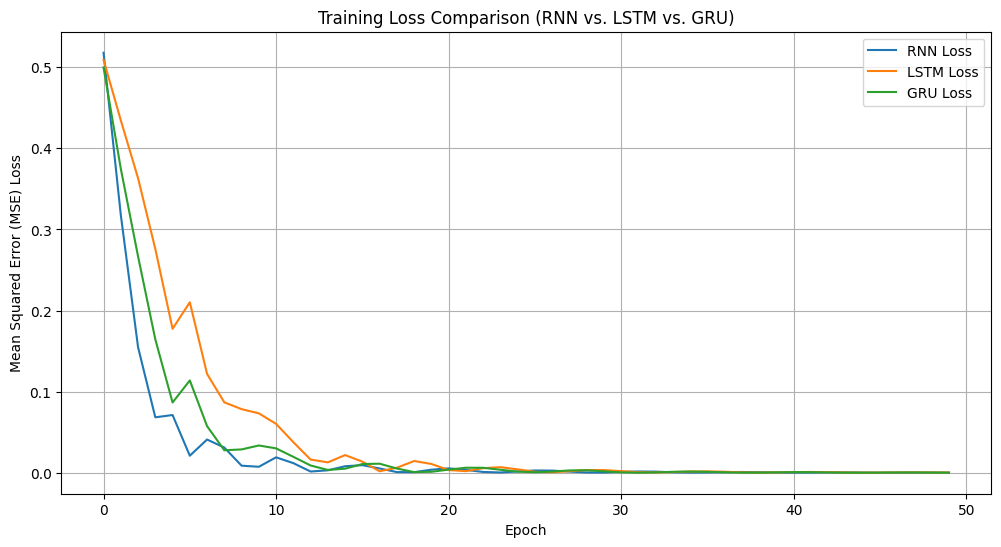

In [9]:
plt.figure(figsize=(12, 6))
for name, losses in loss_history.items():
    plt.plot(losses, label=f'{name} Loss')

plt.title('Training Loss Comparison (RNN vs. LSTM vs. GRU)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE) Loss')
plt.legend()
plt.grid(True)
plt.show()

RNN learns faster at the start but then start fluctuating. LSTM starts slower. GRU is between the RNN and GRU in terms of stability and speed.


RNN learns faster initially due to fewer parameters and direct gradient flow.
